## Reddit Comments impact on BitCoin Price (Lag Time Discover)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from dateutil import tz
import time

In [2]:
# Reddit_cleaned
reddit_data = pd.read_csv('Reddit_cleaned.csv', encoding = "ISO-8859-1")

In [3]:
reddit_data.head()

,Unnamed: 0,score,created_utc,polarity,subjectivity
0,0,255.0,1.515851e+09,0.000000,0.000000
1,1,123.0,1.515829e+09,0.200000,0.200000
2,2,46.0,1.515825e+09,0.300000,0.200000
3,3,32.0,1.515896e+09,0.109901,0.386412
4,4,29.0,1.515833e+09,0.150000,0.150000


In [4]:
reddit_data['multi'] = reddit_data.polarity * reddit_data.score
reddit_data['multi'].head()

0     0.000000
1    24.600000
2    13.800000
3     3.516819
4     4.350000
Name: multi, dtype: float64

In [5]:
reddit_data = reddit_data[reddit_data['multi'] !=0]

In [6]:
reddit_data_sorted = reddit_data.sort_values(['created_utc'])
reddit_data_min = min(reddit_data_sorted['created_utc']) 
reddit_data_max = max(reddit_data_sorted['created_utc'])
length = reddit_data_sorted.shape[0]

print(reddit_data_min, reddit_data_max)

1514764808.0 1522540790.0


In [7]:
reddit_data_sorted['class'] = reddit_data_sorted['created_utc']

In [8]:
reddit_data_sorted['class'] = np.floor((reddit_data_sorted['created_utc'] - 1514764808.0)/3600) + 1

In [9]:
reddit_data_sorted.head

<bound method NDFrame.head of          Unnamed: 0  score   created_utc  polarity  subjectivity      multi  \
336144       361645    3.0  1.514765e+09  0.950000      0.650000   2.850000   
951054      1036854    1.0  1.514765e+09  0.800000      1.000000   0.800000   
724590       787704    1.0  1.514765e+09  0.400000      0.800000   0.400000   
696377       755452    1.0  1.514765e+09  0.375000      0.475000   0.375000   
363633       389832    5.0  1.514765e+09  0.300000      0.800000   1.500000   
1041333     1144541    1.0  1.514765e+09  0.107143      0.477143   0.107143   
150802       152135   95.0  1.514765e+09  1.000000      1.000000  95.000000   
440754       472918    1.0  1.514765e+09  0.100000      0.150000   0.100000   
786432       862811    1.0  1.514765e+09  0.136364      0.454545   0.136364   
187919       193923    1.0  1.514765e+09 -0.400000      0.600000  -0.400000   
446265       479926    1.0  1.514765e+09  0.095238      0.545238   0.095238   
772985       847732   

In [10]:
reddit_data_sorted = reddit_data_sorted[['multi','class']]

In [11]:
reddit_data_sorted_group = reddit_data_sorted.groupby('class').mean()

In [12]:
reddit_data_sorted_group.head()

,multi
class,
1.0,0.764779
2.0,0.466948
3.0,0.616579
4.0,0.485955
5.0,0.647891


In [13]:
reddit_data_sorted_group['multi'] = np.where(reddit_data_sorted_group['multi']>0, 1, -1)

In [14]:
reddit_data_sorted_group.head()

,multi
class,
1.0,1
2.0,1
3.0,1
4.0,1
5.0,1


In [15]:
# BitCoin
btc = pd.read_csv('btc_usd.csv', encoding = "ISO-8859-1")

In [16]:
btc.head()

,Unnamed: 0,id,datetime,type,quantity,price,total
0,0,148668314,2018-01-01 00:00:01,sell,0.100000,13763.0,1376.300000
1,1,148668317,2018-01-01 00:00:01,buy,0.010000,13766.0,137.660000
2,2,148668334,2018-01-01 00:00:02,buy,0.105929,13767.0,1458.325094
3,3,148668333,2018-01-01 00:00:02,buy,0.244811,13766.0,3370.068777
4,4,148668332,2018-01-01 00:00:02,buy,0.025234,13766.0,347.375374


In [17]:
btc['realtime'] = btc['datetime'].str.slice(5, 13)

In [18]:
btc_ts = btc[['realtime', 'price']]

In [19]:
btc_ts_group = btc_ts.groupby('realtime').mean()

In [20]:
btc_ts_group.head()

,price
realtime,
01-01 00,13606.842210
01-01 01,13461.962401
01-01 02,13333.441535
01-01 03,13447.868240
01-01 04,13426.570852


In [21]:
pricelist = list(btc_ts_group['price'])

In [49]:
accr_list = []
for k in range(1,40):

    shift_price_listk = [0] + pricelist

    pricelistk = pricelist + [0]

    slopek = [y - x for x, y in zip(shift_price_listk, pricelistk)]

    slopek = slopek[k: -2]

    slope_df = pd.DataFrame(slopek)

    slope_df.columns = ['price_slope']

    slope_df['price_slope'] = np.where(slope_df['price_slope']>0, 1, -1)

    list_reddit_data_sorted_group = list(reddit_data_sorted_group['multi'])
    list_slope_df = list(slope_df['price_slope'])                                     
    diff = [y - x for x, y in zip(list_reddit_data_sorted_group, list_slope_df)]
    error_len = sum(diff)/(-2)

    full_len = len(list_slope_df)


    accr = (full_len - error_len) / full_len
    accr_list.append(accr)

print(accr_list)


[0.5295790671217292, 0.5298804780876494, 0.5301822323462415, 0.5299145299145299, 0.5302166476624858, 0.5299486594409584, 0.5296803652968036, 0.5294117647058824, 0.5297142857142857, 0.5300171526586621, 0.5303203661327232, 0.5306239267315398, 0.5309278350515464, 0.5312320916905444, 0.5315366972477065, 0.5312679288582903, 0.5315729047072331, 0.5313038483630098, 0.5310344827586206, 0.5307648073605521, 0.5304948216340621, 0.5302245250431779, 0.5305299539170507, 0.5302593659942363, 0.5299884659746251, 0.5291402192729371, 0.5294457274826789, 0.5297515886770653, 0.5300578034682081, 0.529786003470214, 0.5295138888888888, 0.5292414591777649, 0.5289687137891078, 0.528695652173913, 0.5284222737819025, 0.5287289611143354, 0.5284552845528455, 0.5281812899477049, 0.5279069767441861]


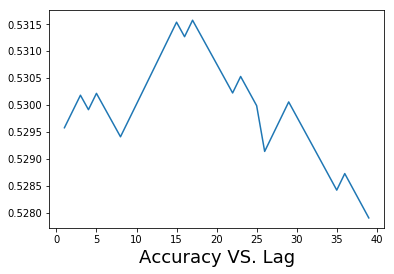

In [50]:
plt.plot(range(1,40), accr_list)
plt.xlabel('Accuracy VS. Lag', fontsize=18)
plt.savefig('Accuracy VS Lag .png')



In [27]:
slope_df.columns = ['price_slope']

In [28]:
slope_df['price_slope'] = np.where(slope_df['price_slope']>0, 1, -1)

In [29]:
slope_df.head()

,price_slope
0,-1
1,-1
2,1
3,-1
4,1


In [ ]:
# reddit_data_sorted_group.head()
# slope_df.head()

In [36]:
list_reddit_data_sorted_group = list(reddit_data_sorted_group['multi'])
list_slope_df = list(slope_df['price_slope'])                                     
diff = [y - x for x, y in zip(list_reddit_data_sorted_group, list_slope_df)]
error_len = sum(diff)/(-2)
print(error_len)
full_len = len(list_slope_df)
print(full_len)

accr = (full_len - error_len) / full_len
accr                    

827.0
1759


0.5298465036952814